In [1]:
#importing the libraries

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Loading the dataset from yahoo
df = web.DataReader('AC.TO', data_source='yahoo', start='2012-01-01', end='2021-02-16') 


#displaying the first 5 rows of the data
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-09,21.629999,21.200001,21.610001,21.500000,3247400,21.500000
2021-02-10,21.400000,21.000000,21.299999,21.080000,3490800,21.080000
2021-02-11,21.330000,20.809999,21.139999,21.200001,3466400,21.200001
2021-02-12,22.450001,21.379999,21.600000,22.330000,6869000,22.330000
2021-02-16,23.549999,22.480000,23.000000,23.420000,7055200,23.420000


In [3]:
#checking the number of rows and columns in the dataset
df.shape

(2290, 6)

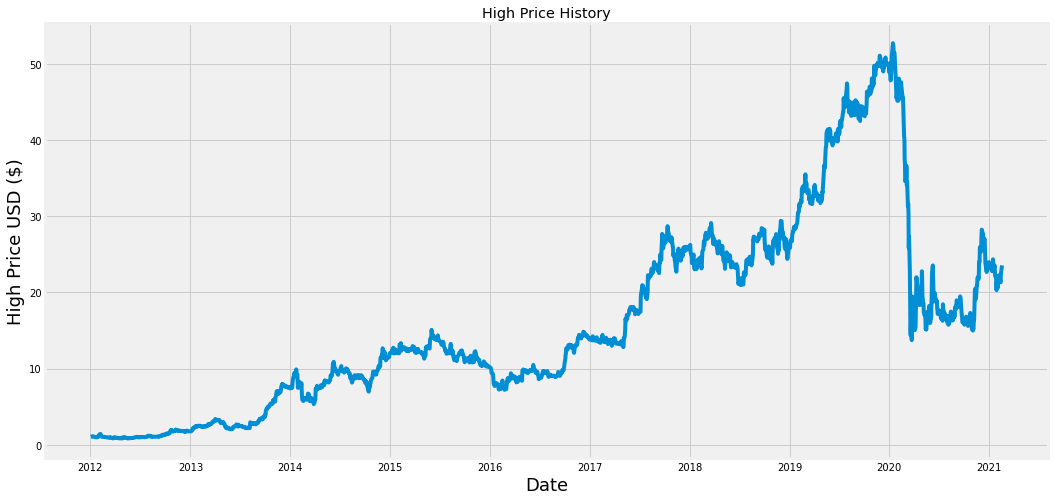

In [4]:
plt.figure(figsize=(16,8))
plt.title('High Price History')
plt.plot(df['High'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('High Price USD ($)',fontsize=18)
plt.show()

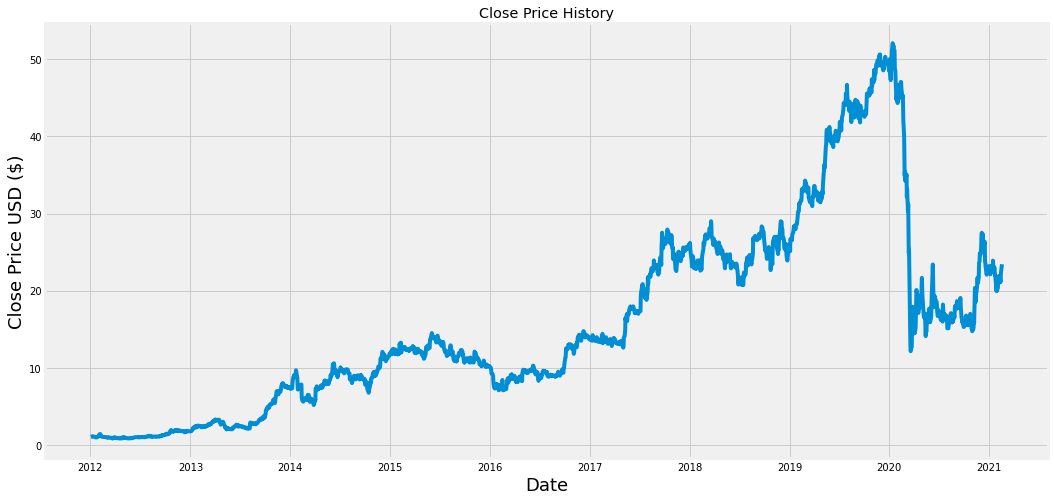

In [5]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [6]:
#creating the new dataframe with only closing price value
data = df.filter(['Close'])

data.head(5)

,Close
Date,
2012-01-03,1.02
2012-01-04,1.03
2012-01-05,1.07
2012-01-06,1.08
2012-01-09,1.11


In [7]:
#converting the dataset in to numpy array format
dataset = data.values

dataset[6,0]

1.100000023841858

In [8]:
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

training_data_len

1832

In [9]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00390092],
       [0.00409596],
       [0.00487615],
       ...,
       [0.39750343],
       [0.41954359],
       [0.44080359]])

In [10]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]


In [11]:
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
      print(x_train)
      print(y_train)
      print()
    

[array([0.00390092, 0.00409596, 0.00487615, 0.00507119, 0.00565633,
       0.00585138, 0.00546128, 0.00507119, 0.0046811 , 0.00429101,
       0.00390092, 0.00390092, 0.00331578, 0.00292569, 0.00312073,
       0.00273064, 0.00312073, 0.00429101, 0.0046811 , 0.00487615,
       0.00487615, 0.00663156, 0.00877706, 0.01053248, 0.0115077 ,
       0.01014238, 0.00955724, 0.00643651, 0.00526624, 0.00429101,
       0.00429101, 0.00409596, 0.00390092, 0.00409596, 0.00390092,
       0.00390092, 0.00351083, 0.00370587, 0.00370587, 0.00351083,
       0.00312073, 0.00273064, 0.00234055, 0.00292569, 0.00292569,
       0.0021455 , 0.00234055, 0.0025356 , 0.00195046, 0.0021455 ,
       0.0021455 , 0.00195046, 0.00195046, 0.00175541, 0.00117028,
       0.00058514, 0.        , 0.        , 0.00156037, 0.0025356 ])]
[0.00312073387414738]



In [12]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1772, 60, 1)

In [14]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [15]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
#Train the model
model.fit(x_train, y_train, batch_size=64, epochs=1000)

Epoch 1/1000
28/28 [==============================] - 34s 10ms/step - loss: 0.0374
Epoch 2/1000
28/28 [==============================] - 0s 7ms/step - loss: 8.6290e-04
Epoch 3/1000
28/28 [==============================] - 0s 7ms/step - loss: 3.1082e-04
Epoch 4/1000
28/28 [==============================] - 0s 7ms/step - loss: 2.7557e-04
Epoch 5/1000
28/28 [==============================] - 0s 9ms/step - loss: 2.3409e-04
Epoch 6/1000
28/28 [==============================] - 0s 8ms/step - loss: 2.4070e-04
Epoch 7/1000
28/28 [==============================] - 0s 7ms/step - loss: 2.4177e-04
Epoch 8/1000
28/28 [==============================] - 0s 7ms/step - loss: 2.2698e-04
Epoch 9/1000
28/28 [==============================] - 0s 8ms/step - loss: 2.5637e-04
Epoch 10/1000
28/28 [==============================] - 0s 7ms/step - loss: 2.4748e-04
Epoch 11/1000
28/28 [==============================] - 0s 8ms/step - loss: 2.4280e-04
Epoch 12/1000
28/28 [==============================] - 0s 9ms/ste

In [17]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]

#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [18]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [19]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(458, 60, 1)

In [20]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [21]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

1.050040945945723

In [22]:
 # the error accuracy
from sklearn import metrics
rsme=np.sqrt(metrics.mean_squared_error(y_test,predictions))

print('accuracy  ::' + str(100-rsme))

accuracy  ::98.94995905405428


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


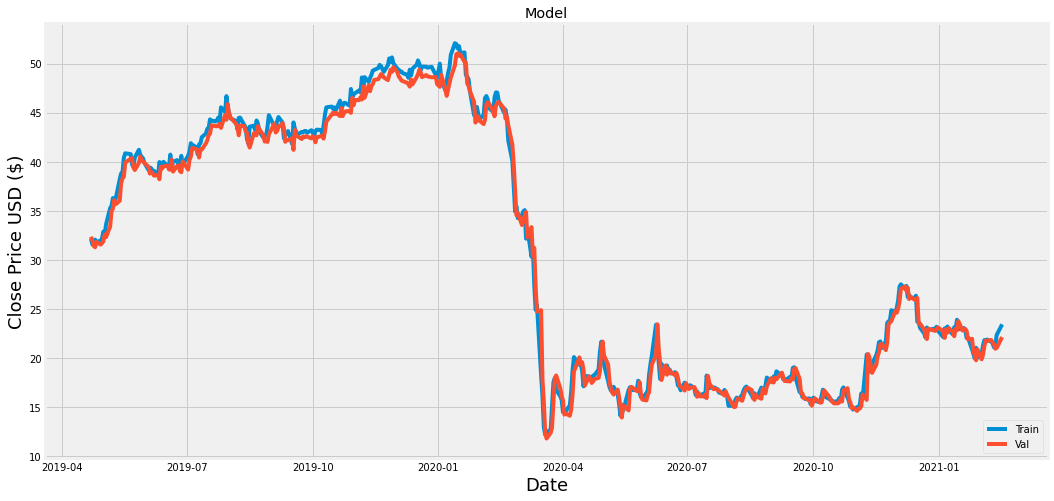

In [24]:
#Plot/Create the data for the graph
#train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid.tail(10)

In [ ]:
model.save("model.h5")

In [ ]:
from keras.models import load_model
model2 = load_model('model.h5')
model2.summary()

In [ ]:
predictions2 = model2.predict(x_test)
predictions2 = scaler.inverse_transform(predictions2)

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions2- y_test)**2)))
rmse

In [ ]:
len(test_data)


In [ ]:
x_input = test_data[418:]
x_input.shape

In [ ]:
temp_input = x_input

In [ ]:
temp_input

In [ ]:
temp_input.shape

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0

while (i<30):
  if(len(temp_input)>100):
    #print(len(temp_input))
    x_input=np.array(temp_input[1:])
    #print("{} day input {}".format(i,x_input))
    x_input = x_input.reshape((1, n_steps, 1))
    #print(x_input)
    predicted_value = model.predict(x_input)
    #print("{} day output {}".format(i,predicted_value))
    temp_input = np.append( temp_input,predicted_value[0])
    temp_input=temp_input[1:]
    lst_output = np.append(lst_output,predicted_value[0])
    i=i+1
  else:
    #print(temp_input)
    x_input = np.reshape(x_input, (1,n_steps,1))
    #print(x_input.shape)
    predicted_value = model.predict(x_input)
    #print(predicted_value)
    temp_input = np.append( temp_input,predicted_value[0])
    #print(len(temp_input))
    lst_output = np.append(lst_output,predicted_value[0])
    i=i+1
    
print(lst_output)


In [ ]:
print(lst_output.shape)

In [ ]:
lst_output = np.reshape(lst_output, (len(lst_output),1))
lst_output.shape

In [ ]:
next_pred = scaler.inverse_transform(lst_output)

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

In [ ]:
us_holidays = CustomBusinessDay(calendar = USFederalHolidayCalendar())


In [ ]:

index_future_dates = pd.date_range(start='02/16/2021', periods=len(next_pred), freq=us_holidays)
df_next_pred = pd.DataFrame(data=next_pred)
df_next_pred.index = index_future_dates
df_next_pred